In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from seaborn import regression
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('data/INR=X (1).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-06,73.115799,73.488998,73.043999,73.108299,73.108299,0
1,2020-10-07,73.815002,73.815002,73.080002,73.815002,73.815002,0
2,2020-10-08,73.542503,73.546501,73.194000,73.542503,73.542503,0
3,2020-10-09,73.280502,73.497299,72.976997,73.280502,73.280502,0
4,2020-10-12,73.014900,73.413200,72.933998,73.014801,73.014801,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


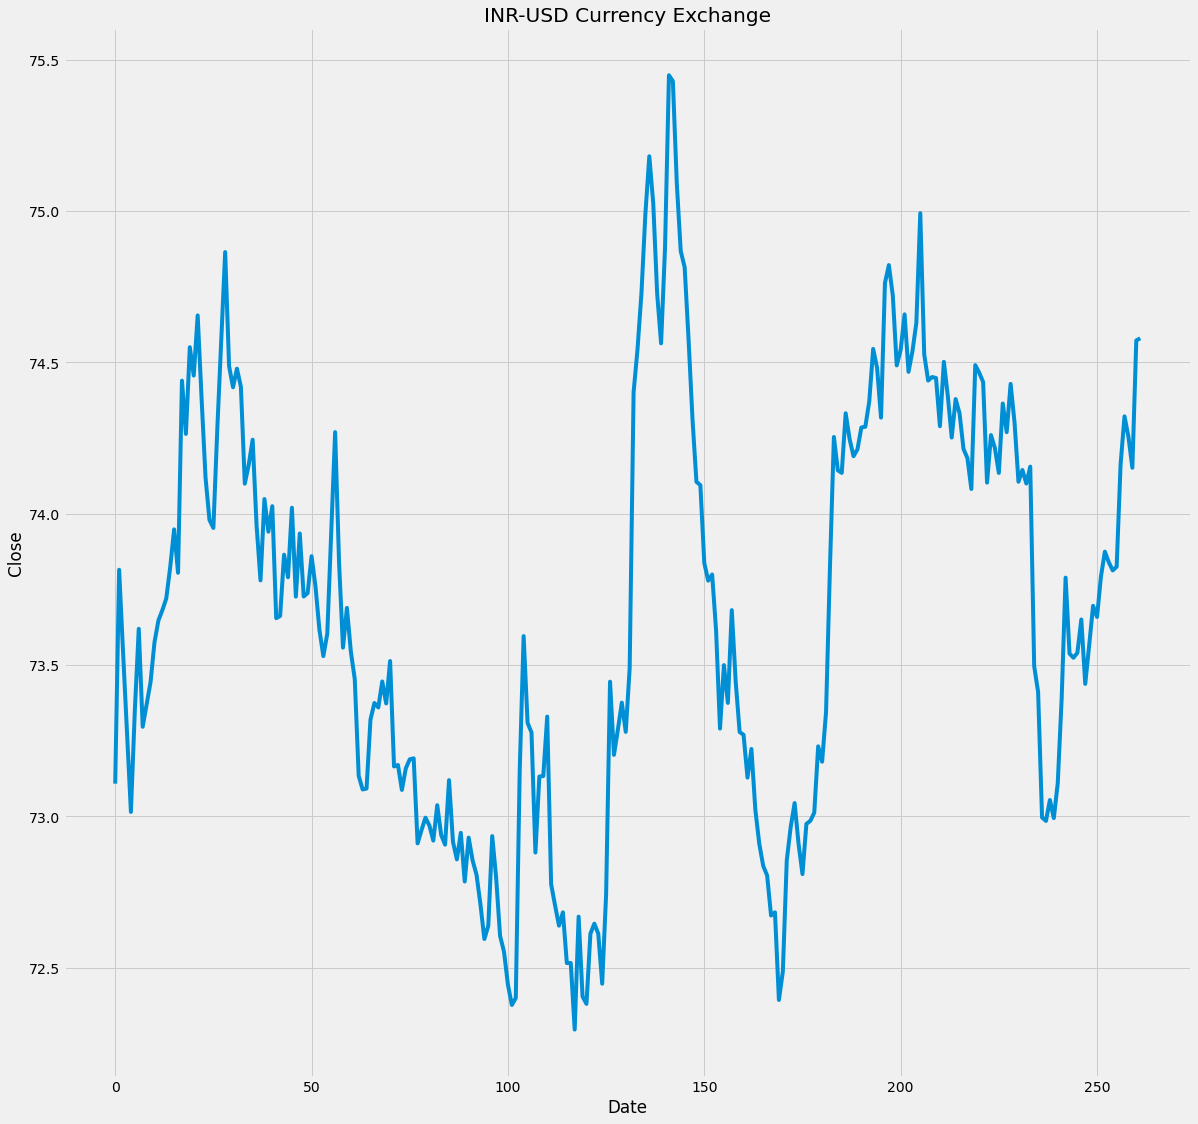

In [4]:
plt.figure(figsize=(18,18))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('INR-USD Currency Exchange')
plt.plot(data['Close'])
plt.show()

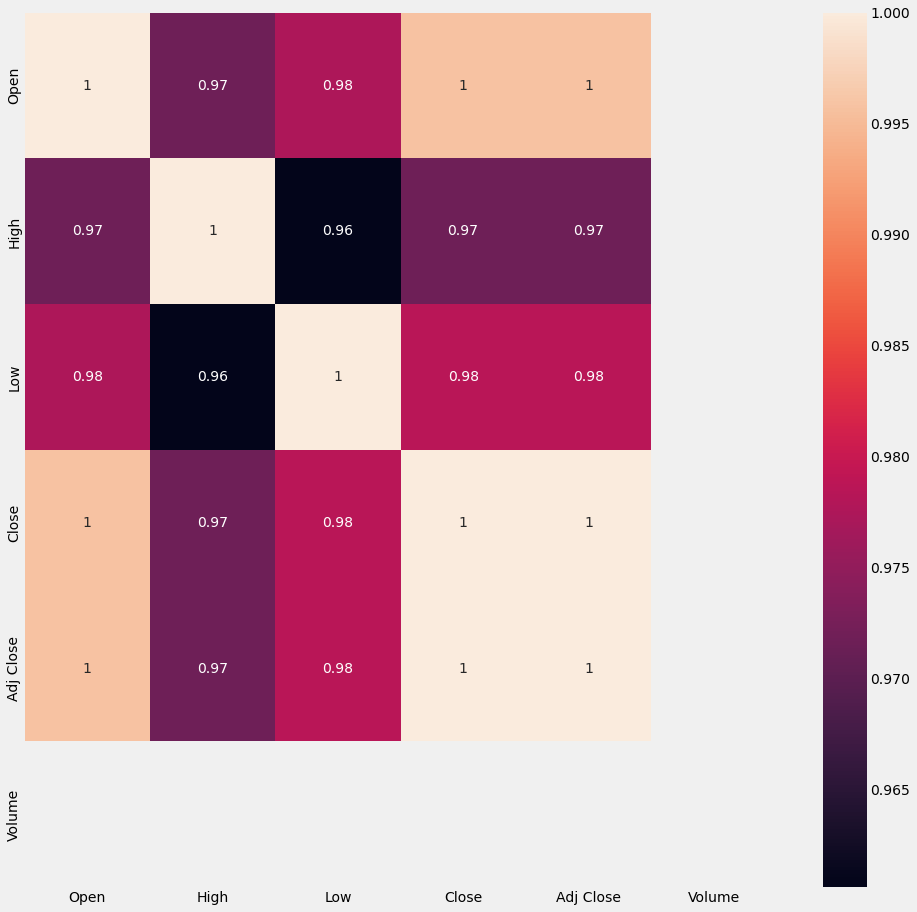

In [7]:
plt.figure(figsize=(15,15))
sbn.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
x = np.array(data[['Open', 'High', 'Low']])
y = np.array(data['Close'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [12]:
data = pd.DataFrame(data={"Predicted Rate": y_pred.flatten()})
print(data.head())

   Predicted Rate
0       72.605400
1       74.440002
2       74.364502
3       73.824097
4       73.790298
